In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
data=pd.read_csv("netflix.csv")

In [ ]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."




*   from the overview, it is understood that , director, cast, country,listed_in are need to be unnested for better accuracy
*  duration is minutes for movies and seasons for tv_shows






In [ ]:
#to check number of rows and columns
data.shape

(8807, 12)



*   8807 rows and 12 columns



In [ ]:
# to check data types of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB





*   from overviewing the info data,it is observed that, "director", "cast","country " are having so many null values
*   date_added is in object data type, need to convert to date_time data type





In [ ]:
# statistical summary
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000




*   50 % of content released in the time of 2017 to 2021.



In [ ]:
data.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4




*   "show_id","title" are unique
*   "type" and"rating" are categorical data




In [ ]:
#missing value detection
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



*   it is observing null values per column, columns that are director, cast, country are having najor null values and deleting those null value rows leads to great data loss so fill those null values as "unknown"



<Axes: >

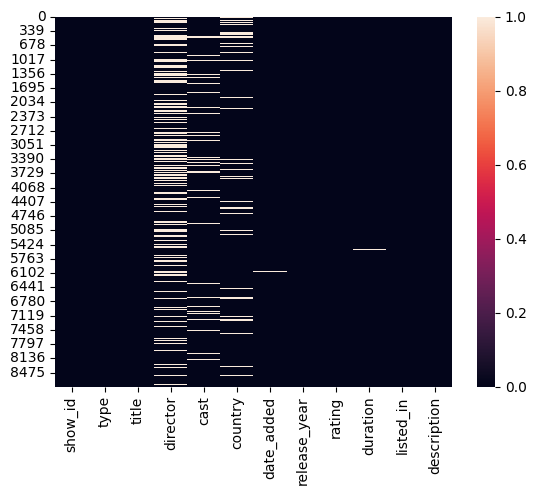

In [ ]:
#visual representation of null values(missing values) using heat map
sns.heatmap(data.isna())

In [ ]:
#filling null data with "unknown"
data[["director","cast","country"]]=data[["director","cast","country"]].fillna("unknown")


In [ ]:
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64



*   we will drop null value rows in  date_added column when doing date related analysis



In [ ]:
#value_count of ratings to understand which rated content is popular
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64



*   in the last lines of the data, it is understandable that the data belong to "duration" attribute, as it is having "min"



In [ ]:
data.loc[(data["rating"]=="74 min")|(data["rating"]=="84 min")|(data["rating"]=="66 min")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#we will move the time in rating attribute of the above 3 rows, to the duration attribute
data["duration"][[5541,5794,5813]]=data["rating"][[5541,5794,5813]]
data["rating"][[5541,5794,5813]]="Nan"

<ipython-input-148-e4bdb30d3711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["duration"][[5541,5794,5813]]=data["rating"][[5541,5794,5813]]
<ipython-input-148-e4bdb30d3711>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rating"][[5541,5794,5813]]="Nan"


In [ ]:
# conforming that the data is moved
data["duration"][[5541,5794,5813]]

5541    74 min
5794    84 min
5813    66 min
Name: duration, dtype: object

In [ ]:
# conversion of categorical attributes to 'category'  and date attributes to "date_time"
data=data.astype({"type":"category","rating":"category"})

data["date_added"]=pd.to_datetime(data["date_added"])



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB




*  data is cleaned and dealt with missing values and converted categorical attributes to category and date attribute to dattime



In [ ]:
#UNIVARIATE ANALYSIS
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

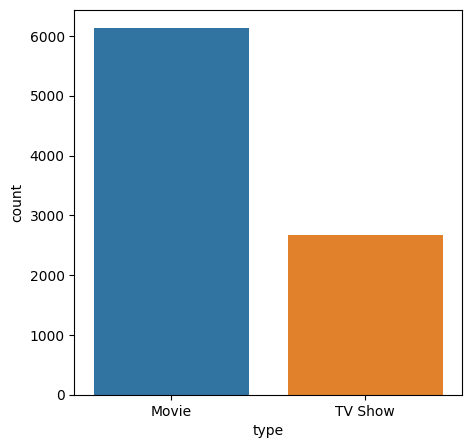

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="type", data=data)

plt.show()

* in the overall data there is a greate difference between number of movies and number of tv_shows

In [ ]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Nan            3
UR             3
Name: rating, dtype: int64

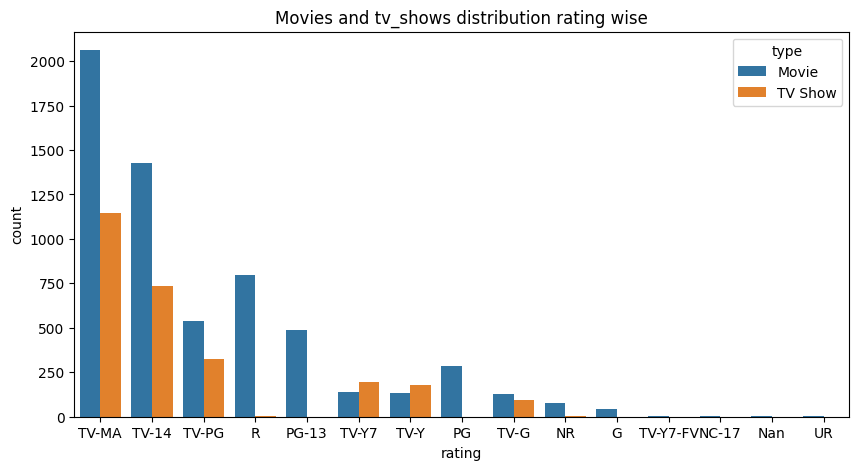

In [ ]:
plt.figure(figsize=(10,5))
order=data['rating'].value_counts().index
sns.countplot(x="rating", data=data,hue="type",order=order)
plt.title("Movies and tv_shows distribution rating wise")
plt.show()

* most tv_shows and movies are belong to TV-MA followed by TV-14 rating

In [ ]:
movie_data=data.loc[data["type"]=="Movie"]
tv_data=data.loc[data["type"]=="TV Show"]

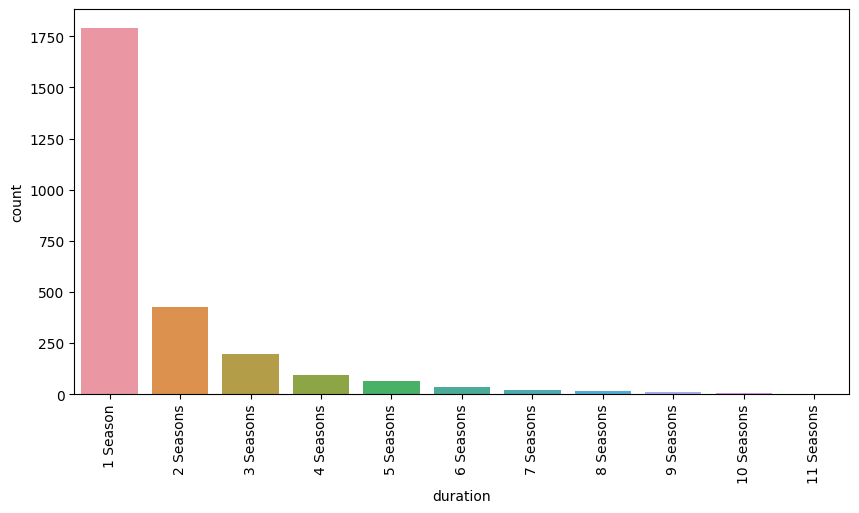

In [ ]:
plt.figure(figsize=(10,5))
season_order = ['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons', '11 Seasons']
sns.countplot(x="duration", data=tv_data, order=season_order)

plt.xticks(rotation=90)
plt.show()

* it is evident from the data  that majority of the shows relesed as 1 season and very few tv shows relesed more number of seasons
* it is observed that count of tv shows are inversly proportional to the number of seasons released

Text(0.5, 1.0, 'histogram of release year of both tv shows and movies')

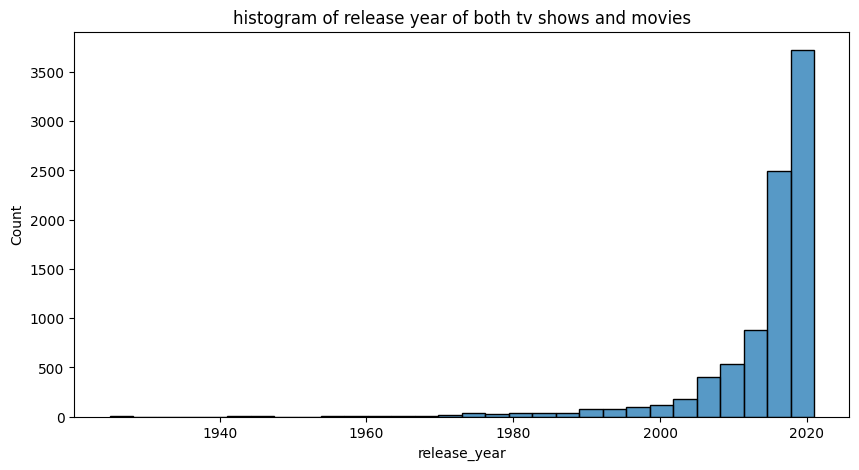

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="release_year", data=data,bins=30)
plt.title("histogram of release year of both tv shows and movies")


* on combine, it is evident that count of tv_shows and movie release increasing with time

Text(0.5, 1.0, 'histogram of relese year of movies')

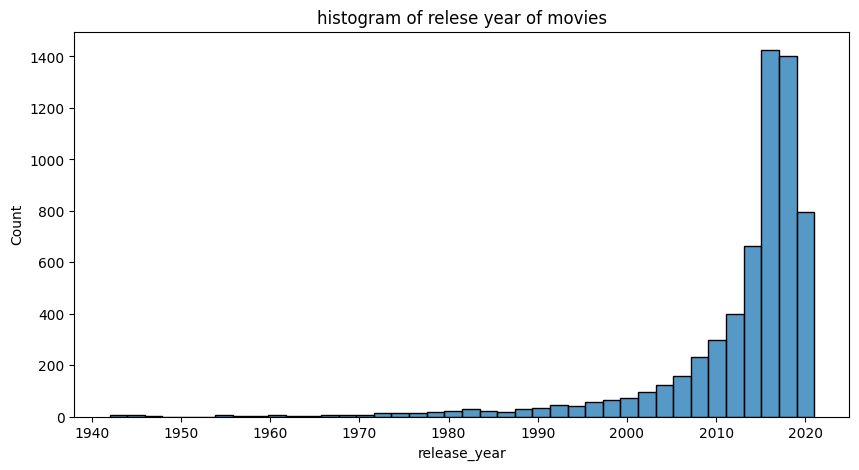

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="release_year", data=movie_data,bins=40)
plt.title("histogram of relese year of movies")


* with only movie data, it is evident that count of movie release increasing with time however declined in the last years

Text(0.5, 1.0, 'histogram of release year of tv shows ')

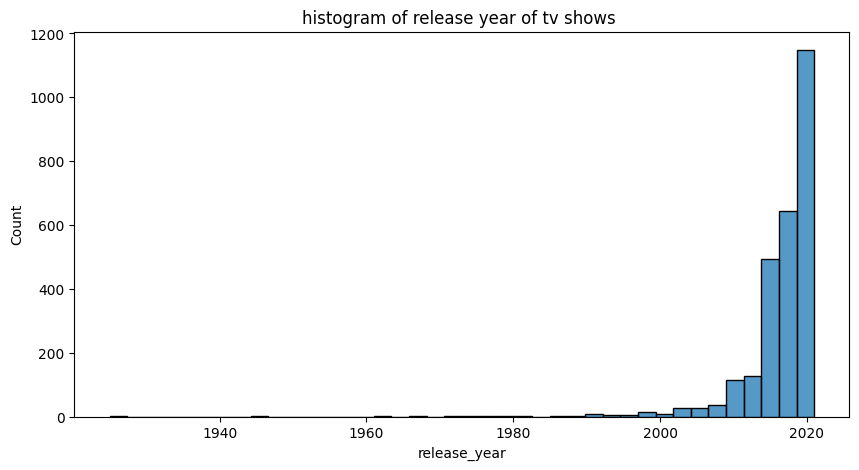

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="release_year", data=tv_data,bins=40)
plt.title("histogram of release year of tv shows ")


* with only tv_show data, it is evident that count of tv_show release increased exponentially

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


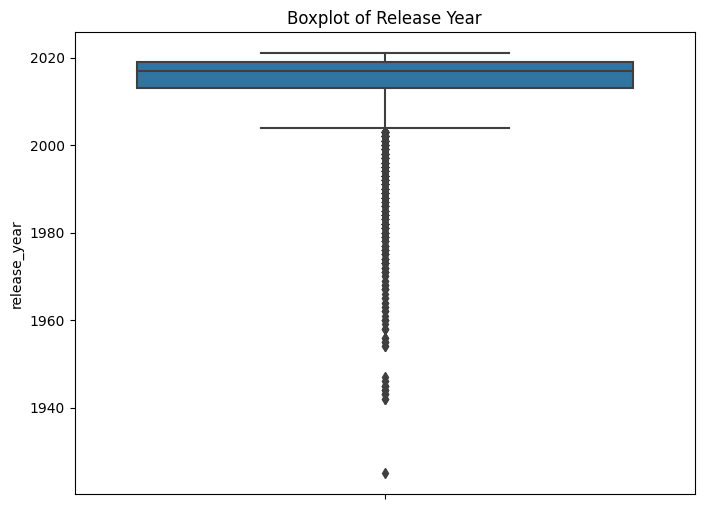

In [ ]:
# Outlier Check for 'Release_year'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['release_year'])

plt.title('Boxplot of Release Year')
plt.show()

* 50% of content relesed between 2017 and 2021
* outliers are observed below 2000

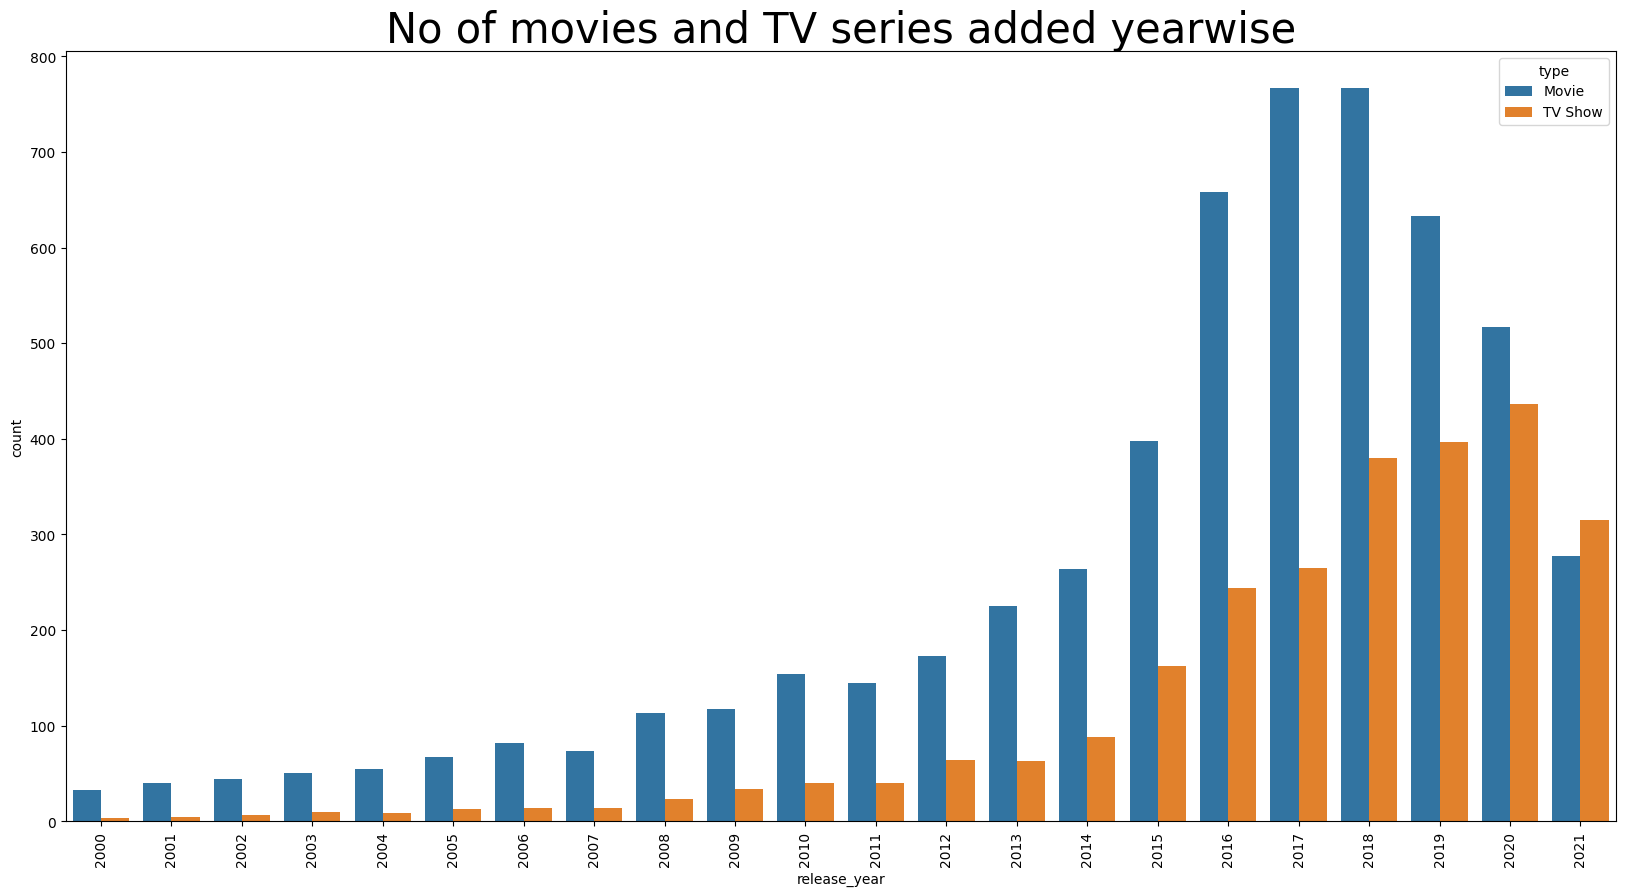

In [ ]:
#BIVARIENT ANALYSIS


#QUANTITY OF CONTENT ADDED ON NETFLIX OVER THE DIFFERENT PERIODS OF TIME
plt.figure(figsize=(20,10))
# mask the years as after 2000 for clear visibility
yr_data=data.loc[data["release_year"]>=2000]
plt.title("No of movies and TV series added yearwise",fontsize=30)
sns.countplot(x="release_year", data=yr_data,hue="type")
plt.xticks(rotation=90)
plt.show()




* from the graph it is evident that trend of number of movies released are at pinacle in 2018 followed by declining trend where as for TV shows increasing trend is seen upto 2020 and following year eventhough movies and TV show release are drastically declined , TV show count surpassed movies.

In [ ]:
date_time_data=data.copy()
date_time_data["year"]=data["date_added"].dt.year
date_time_data["month"]=data["date_added"].dt.month
date_time_data["day"]=data["date_added"].dt.day_name()
date_time_data["month_name"]=data["date_added"].dt.month_name()
monthwise_data=date_time_data.sort_values(by="month")


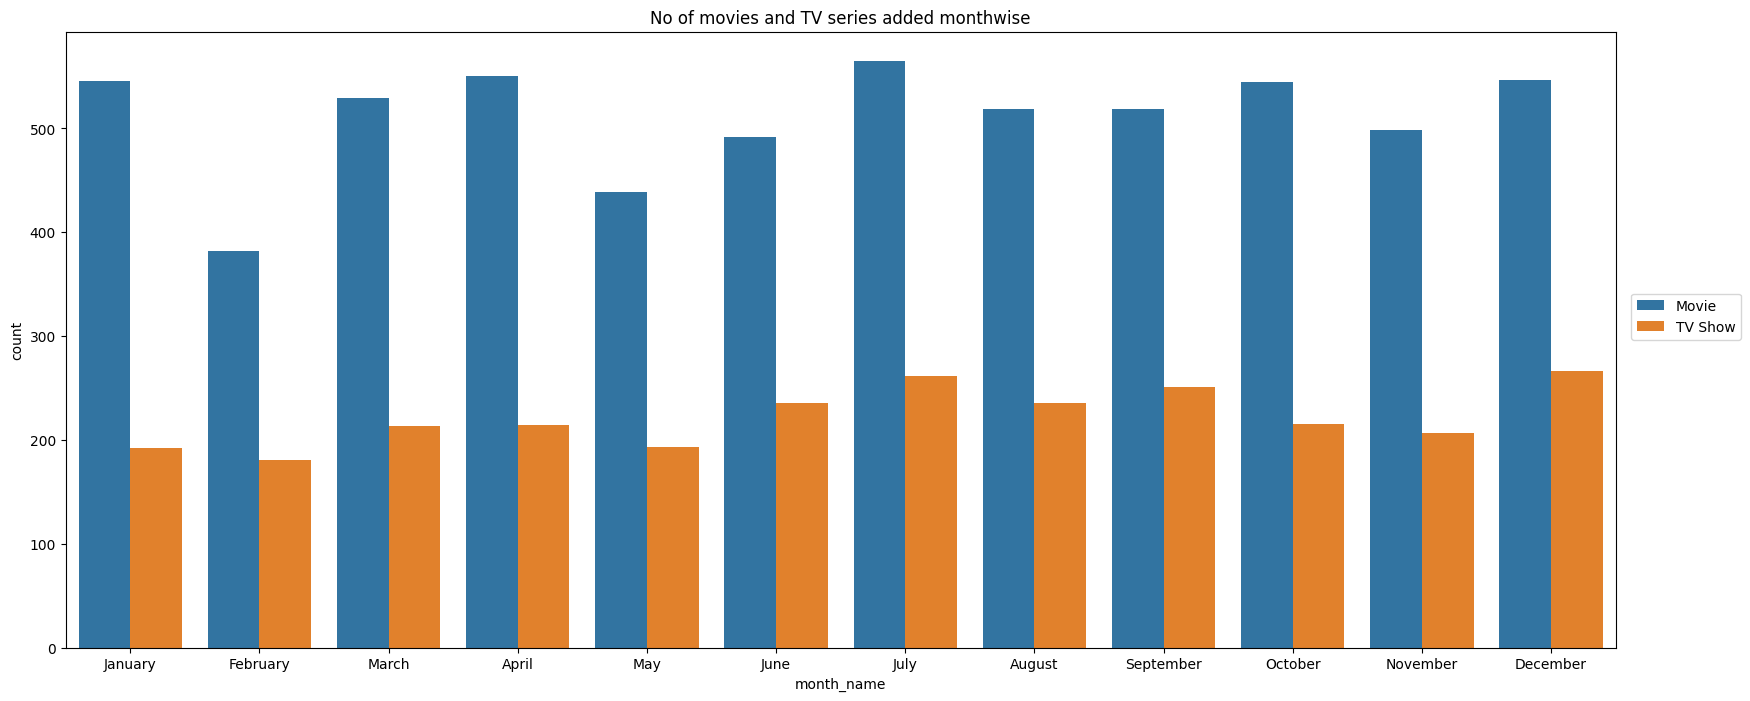

In [ ]:

plt.figure(figsize=(20,8)) #defining fig size fot the graph image
sns.countplot(x = "month_name" , data = monthwise_data , hue = "type")
plt.title("No of movies and TV series added monthwise") #title name of the plot
plt.legend(loc=(1.01,0.5))
plt.show()

* in any month, it is observed that number of movies added for a month is greater than no of tv_shows added
* most of the tv_show content added in the july and december month


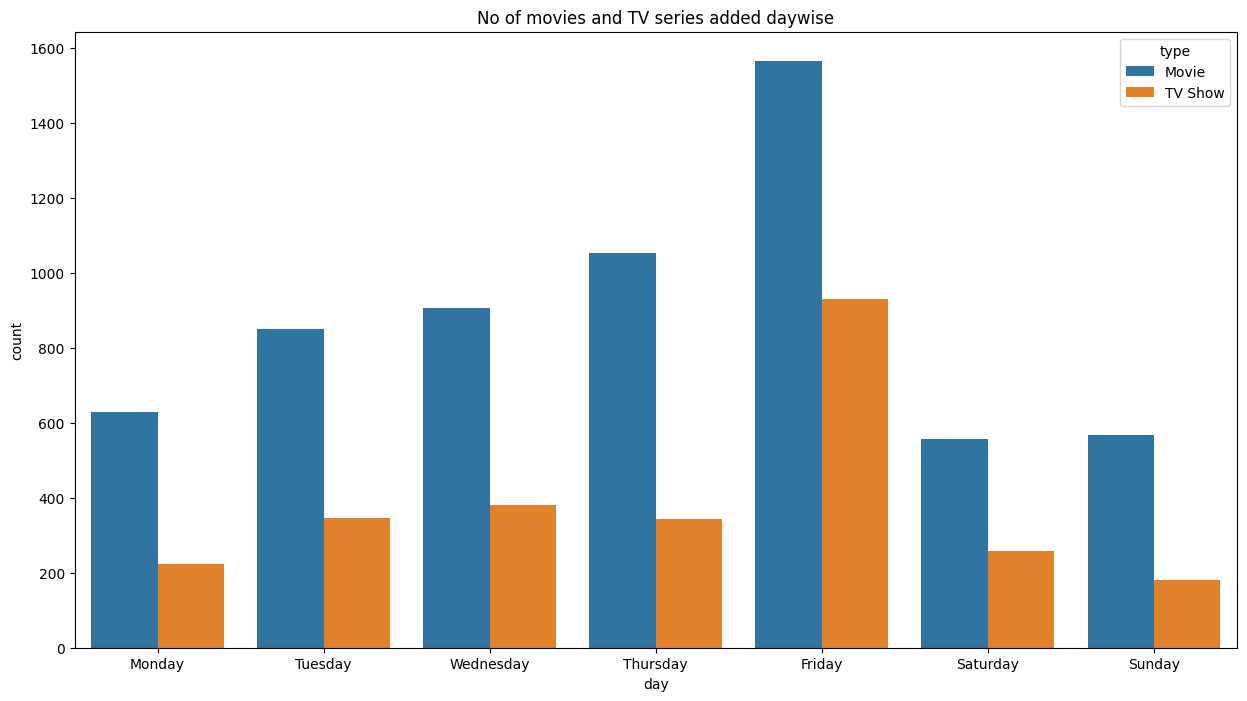

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = "day" , data = date_time_data , hue = "type" ,  order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("No of movies and TV series added daywise")
plt.show()


* most of the content is added on friday, followed by thursday

In [ ]:
#exploding the nested data in directors column.
director = data["director"].apply(lambda x : str(x).split(", ")).tolist()

data_director = pd.DataFrame(director, index = data["title"])
data_director= data_director.stack()
data_director = data_director.reset_index()
data_director.drop(columns ="level_1" , inplace = True)
#droping the columns
data_director.columns = ["title" , "director"]
 #renaming the columns
data_fav_director = data.merge(data_director , on = "title" )
#merging of the dataframes
data_fav_director.head(4)


,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown


In [ ]:
#remove unknown country for better clarity
if "unknown" in data_fav_director.index:

    data_fav_director = data_fav_director[data_fav_director["country"] != "unknown"]


data_fav_director.head(4)

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown


In [ ]:
# Exploding the 'country' column
countries_list = data["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(countries_list, index=data["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns="level_1", inplace=True)
df_country.columns = ["title", "country"]


In [ ]:

Country_wise_trend = data.merge(df_country, on="title")
Country_wise_trend.drop(columns="country_x", inplace=True)
Country_wise_trend.rename(columns={"country_y": "country"}, inplace=True)
Country_wise_trend = Country_wise_trend.loc[Country_wise_trend["country"] != "Unknown"]

# Creating a new DataFrame 'top10_country' to store the count of movies and TV shows for each country
top10_country = Country_wise_trend["country"].value_counts().head(10).reset_index()
top10_country.rename(columns={"index": "country", "country": "count"}, inplace=True)
Country_wise_trend = Country_wise_trend.merge(top10_country, how="inner", on="country")
country_counts = Country_wise_trend["country"].value_counts()




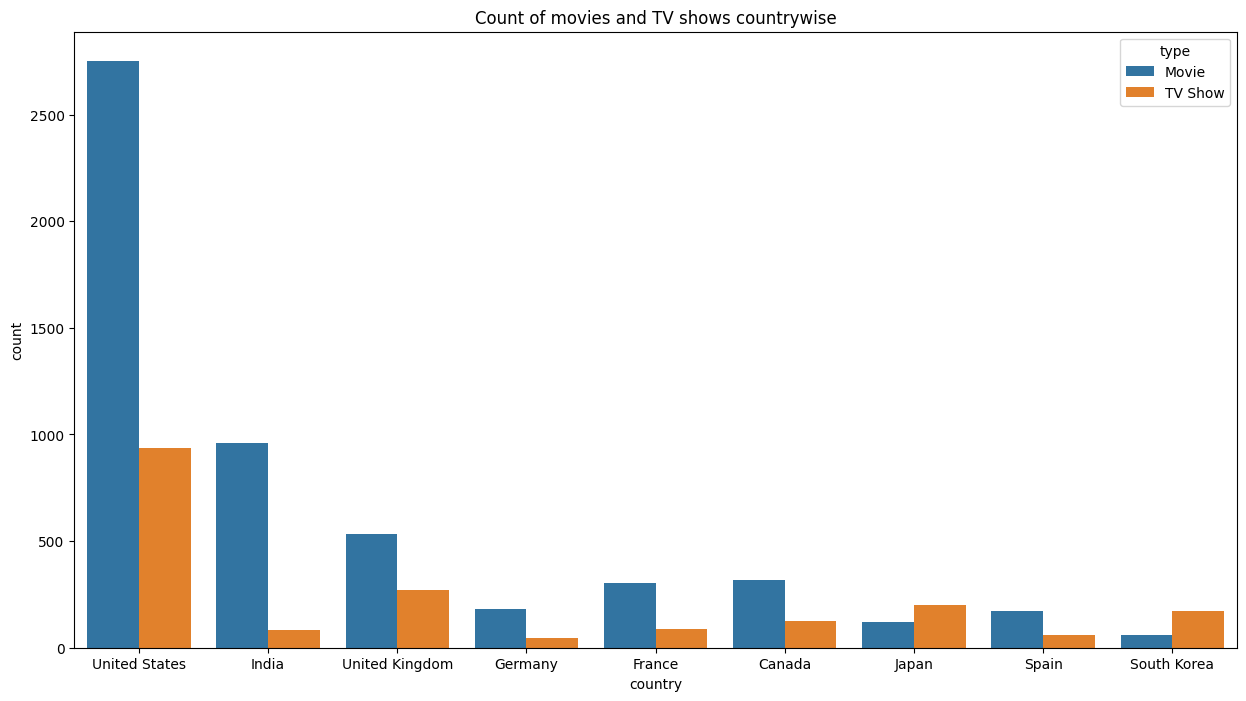

In [ ]:
#remove unknown country for better clarity
if "unknown" in country_counts.index:

    Country_wise_trend = Country_wise_trend[Country_wise_trend["country"] != "unknown"]
# Creating a countplot to visualize the count of movies and TV shows countrywise
plt.figure(figsize=(15, 8))
sns.countplot(x="country", data=Country_wise_trend, hue="type")
plt.title("Count of movies and TV shows countrywise")
plt.show()

* it is recommended to add more movies in united states and india
* it is also recommended to add more tv_shows to japan and south korea

In [ ]:
# Exploding the 'listed_in' column
listed_in_list = data["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in_list, index=data["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns="level_1", inplace=True)
df_genre.columns = ["title", "genre"]
df_genre.head()


,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


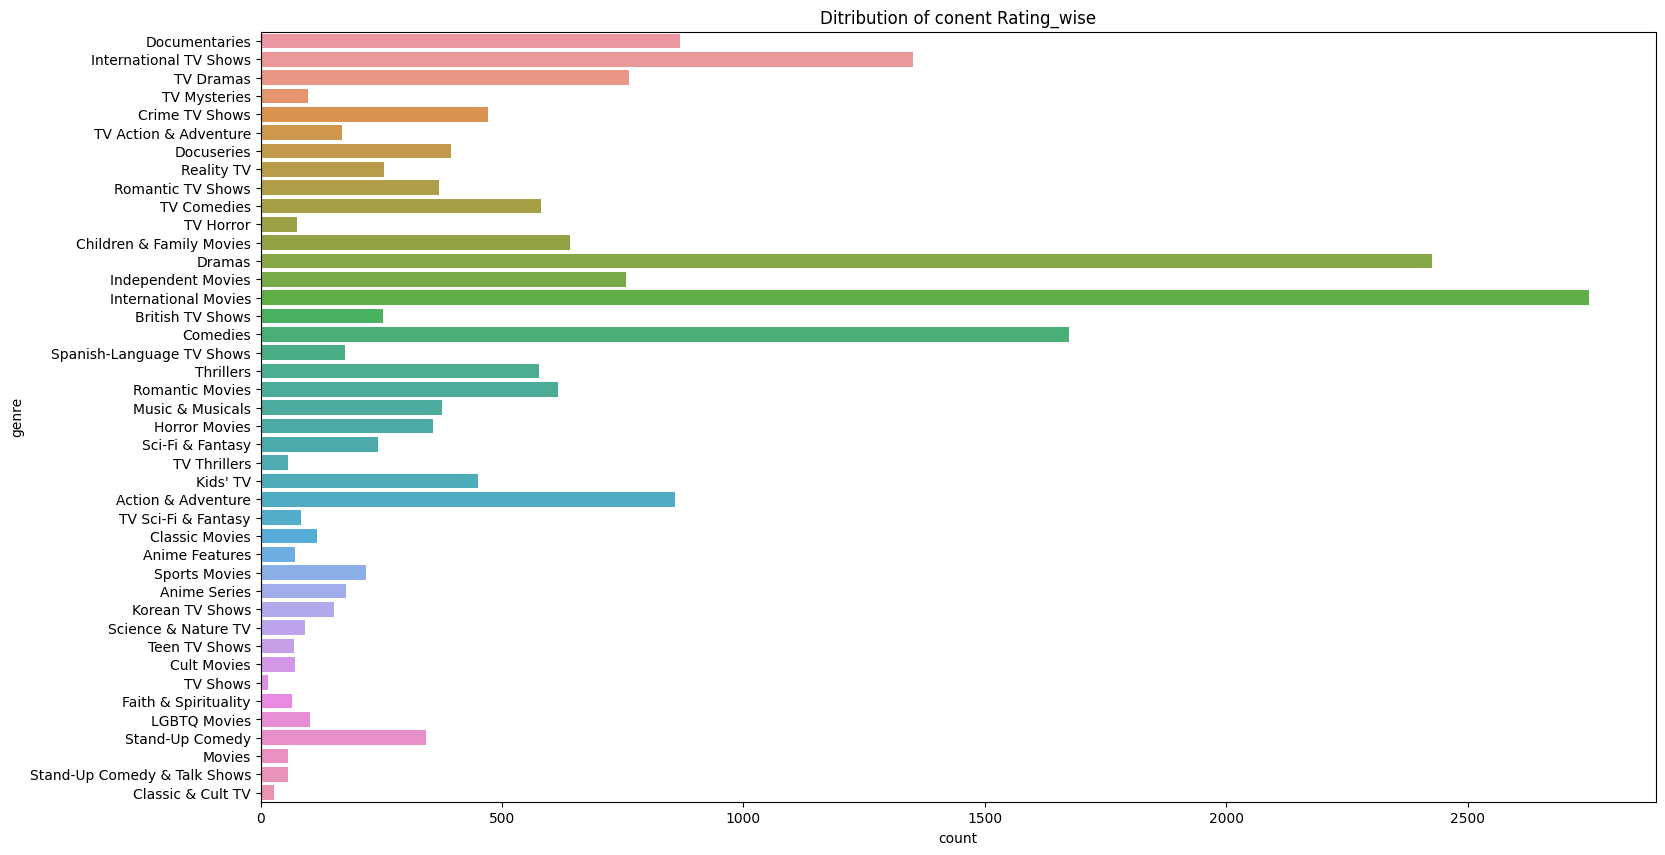

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Ditribution of conent Rating_wise")
plt.show()

top 3 genres in netflix movies and TV shows are


* International Movies
* Dramas
* Comedies




In [ ]:
#Non-Graphical Analysis
director_countrywise = data_fav_director.merge(df_country, on="title")
director_countrywise = director_countrywise.drop(columns=["director_x", "country_x"])
director_countrywise.rename(columns={"director_y": "director", "country_y": "country"}, inplace=True)
director_countrywise = director_countrywise.loc[director_countrywise["director"] != "Unknown"]
director_countrywise.reset_index(inplace=True)
director_countrywise.head()


,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,director,country
0,0,s1,Movie,Dick Johnson Is Dead,unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,United States
1,1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",unknown,South Africa
2,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq,unknown
3,3,s4,TV Show,Jailbirds New Orleans,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown,unknown
4,4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,unknown,India


In [ ]:

country = director_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Directors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'{val}')
    print(director_countrywise.loc[director_countrywise['country']==val, 'director'].value_counts()[1:3])
    print('\n')

 Top 2 Directors of Top 5 Countries


United States
Marcus Raboy    15
Jay Karas       15
Name: director, dtype: int64


India
Anurag Kashyap    9
David Dhawan      9
Name: director, dtype: int64


unknown
Rajiv Chilaka    17
Suhas Kadav      15
Name: director, dtype: int64


United Kingdom
Alastair Fothergill    4
Edward Cotterill       4
Name: director, dtype: int64


Canada
Justin G. Dyck    8
Robb Wells        5
Name: director, dtype: int64


France
Thierry Donard     5
Youssef Chahine    4
Name: director, dtype: int64




* Anurag Kashyap and David Dhawan are the most famous directors for Inida.
* Jay Karas and Marcus Raboyare the most famous directors in United States.

In [ ]:

top_directors = director_countrywise["director"].value_counts().head(4)
if "unknown" in top_directors.index:
    top_directors.drop("unknown", inplace=True)


In [ ]:
top_directors

Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Name: director, dtype: int64

In [ ]:
# Exploding the 'cast' column
cast_list = data["cast"].apply(lambda x: str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast_list, index=data["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns="level_1", inplace=True)
df_cast.columns = ["title", "cast"]

# Merge the 'data' DataFrame with the 'df_cast' DataFrame on the "title" column
df_fav_cast = data.merge(df_cast, on="title")


In [ ]:

cast_countrywise = df_fav_cast.merge(df_country, on="title")
cast_countrywise = cast_countrywise.drop(columns=["cast_x", "country_x"])
cast_countrywise = cast_countrywise.rename(columns={"cast_y": "cast", "country_y": "country"})
cast_countrywise = cast_countrywise.dropna(subset=["cast"]).reset_index(drop=True)
cast_countrywise.head()


,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",unknown,United States
1,s2,TV Show,Blood & Water,unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa


In [ ]:

country_actor = cast_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Actors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'{val}')
    print(cast_countrywise.loc[cast_countrywise['country']==val, 'cast'].value_counts()[:3])
    print('\n')


 Top 2 Actors of Top 5 Countries


United States
unknown              406
Samuel L. Jackson     22
Tara Strong           22
Name: cast, dtype: int64


India
Anupam Kher       40
unknown           39
Shah Rukh Khan    34
Name: cast, dtype: int64


unknown
unknown          154
Julie Tejwani     26
Rupa Bhimani      25
Name: cast, dtype: int64


United Kingdom
unknown               96
David Attenborough    17
John Cleese           16
Name: cast, dtype: int64


Canada
unknown               31
Robb Wells            14
John Paul Tremblay    14
Name: cast, dtype: int64


France
unknown           32
Wille Lindberg     5
Benoît Magimel     5
Name: cast, dtype: int64




* Netflix has added more content for India in which cast are- Anupam Kher or Shah Rukh Khan.

In [ ]:

top_cast = cast_countrywise["cast"].value_counts().head(6)
if "Unknown" in top_cast.index:
    top_cast = top_cast.drop("Unknown")
print(top_cast)


unknown               1004
Anupam Kher             46
David Attenborough      45
Vincent Tong            42
John Cleese             40
Tara Strong             39
Name: cast, dtype: int64


 * the top five actors and most famous actor belongs to India.

In [ ]:
#HEATMAP
df_trend_country = data.merge(df_country , on = "title")
df_trend_country.drop(columns = "country_x" , inplace = True)
df_trend_country.rename(columns = {"country_y":"country"}, inplace = True)

In [ ]:
temp = df_trend_country['country'].value_counts()[:11].reset_index()
temp.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp['country'].tolist()
df_top10country = df_trend_country.loc[df_trend_country['country'].isin(country_list)]
df_top10country = df_top10country.loc[df_top10country["country"]!="Unknown"]

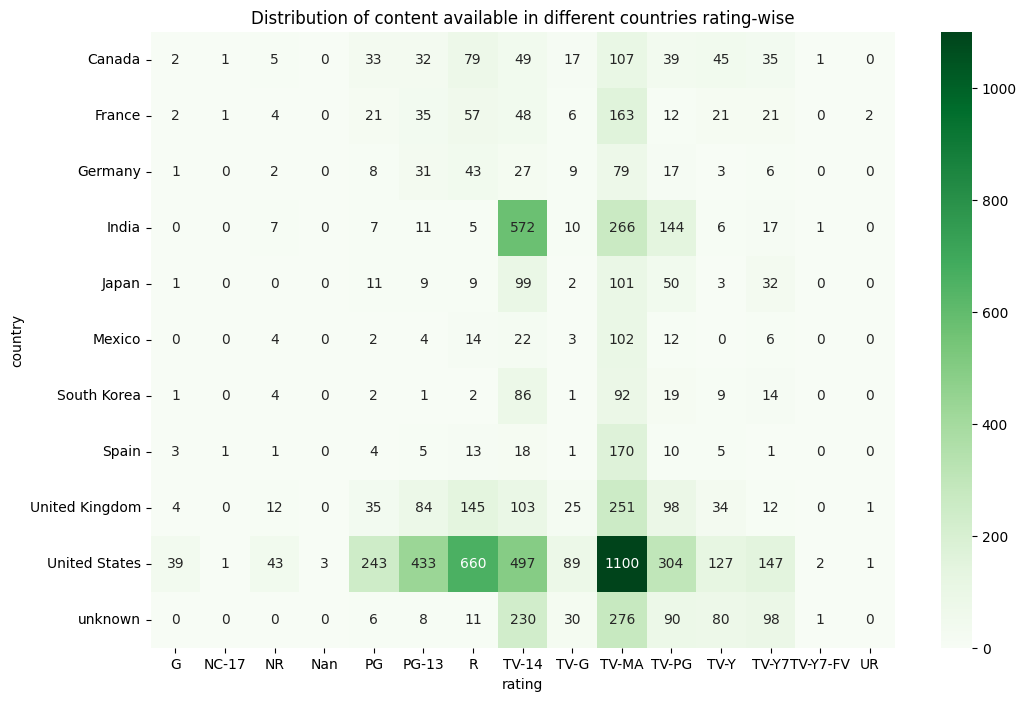

In [ ]:
heat_rating = df_top10country.groupby(["country", "rating"]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heat_rating, annot=True, cmap="Greens", fmt="d")
plt.title("Distribution of content available in different countries rating-wise")
plt.show()




* Top 10 countries are having most content that belongs to TV-MA (Adults
Category)

* India and United States are having large content in TV-14 category.


# **summary**

* Netflix added more movies as compare to TV shows
* Content for United States on netflix is maximum as compare to other countries.
* Netflix content is mostly availabe for adults only
* Most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure.
* In 2021 , there is significant amount of drop in content added due to COVID pandemic.
* Most of viewers of Netflix is from United States followed by India & United Kingdom

Movies:-

* In United States , India and United kingdom movies are more popular as comapre to other countires
* Almost same no. of movies are added on netflix every month.
* Mostly movies are of "100 min" duration.
* Top people casted in Movies are from India.
* "Rajiv Chilakaa" is the most famous director among all.

TV Shows :-

* TV Shows mostly are having season 1 and season 2 respectively.
* For Japan and South Korea, netflix should focus more on TV showes as compare to movies

# **Recommendations :**

Movies :-

* Preferd movies duration is between 90-100 minutes.
* Netflix should add more movies for United States and India falling in category of Internation movies and comedies
* Netflix should add more movies for United States and India having rating of TV-MA & TV-14.
* Top three countries where movies added are United States, India & United Kingdom.
* Netflix shoud add TV Show on Friday than any other weekday.

TV Show:-

* Preferd movies duration is 1-2 seeasons.
* Netflix should focus on countries like Japan, South Korea and France in TV shows , as they prefer TV shows over movies.
* Netflix shoud add TV Show on Friday than other weekday.
* As per 2021 data, count of TV showes are more than movies , this means people wants more web-series as they have for leisure time may be due to work from home scenario.